In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import IsolationForest


In [2]:
path = "kepler_data.csv"  # change if needed

df = pd.read_csv(path, comment="#")
print(df.shape)
df.head()


(9564, 49)


,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [3]:
df.info()
df.describe().T.head(15)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2747 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 16  koi_impact         9201 

,count,mean,std,min,25%,50%,75%,max
kepid,9564.0,7.690628e+06,2.653459e+06,757450.000000,5.556034e+06,7.906892e+06,9.873066e+06,1.293514e+07
koi_score,8054.0,4.808294e-01,4.769285e-01,0.000000,0.000000e+00,3.340000e-01,9.980000e-01,1.000000e+00
koi_fpflag_nt,9564.0,2.085947e-01,4.767290e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,4.650000e+02
koi_fpflag_ss,9564.0,2.327478e-01,4.226049e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
koi_fpflag_co,9564.0,1.975115e-01,3.981423e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
koi_fpflag_ec,9564.0,1.200335e-01,3.250176e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
koi_period,9564.0,7.567136e+01,1.334744e+03,0.241843,2.733684e+00,9.752831e+00,4.071518e+01,1.299958e+05
koi_period_err1,9110.0,2.147864e-03,8.236369e-03,0.000000,5.345750e-06,3.520500e-05,2.762000e-04,1.725000e-01
koi_period_err2,9110.0,-2.147864e-03,8.236369e-03,-0.172500,-2.762000e-04,-3.520500e-05,-5.345750e-06,0.000000e+00
koi_time0bk,9564.0,1.661833e+02,6.791896e+01,120.515914,1.327617e+02,1.372246e+02,1.706946e+02,1.472522e+03


In [4]:
df['koi_disposition'].value_counts()


,count
koi_disposition,
FALSE POSITIVE,4839
CONFIRMED,2746
CANDIDATE,1979


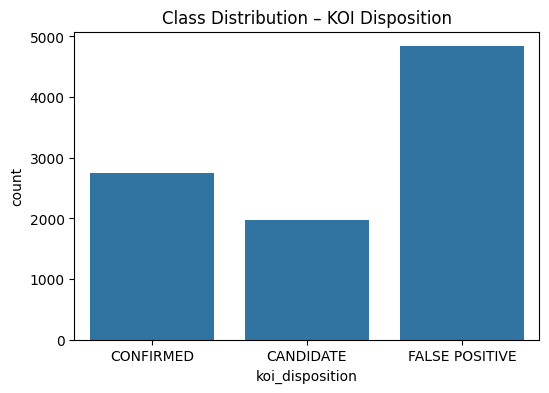

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x='koi_disposition', data=df)
plt.title("Class Distribution – KOI Disposition")
plt.show()


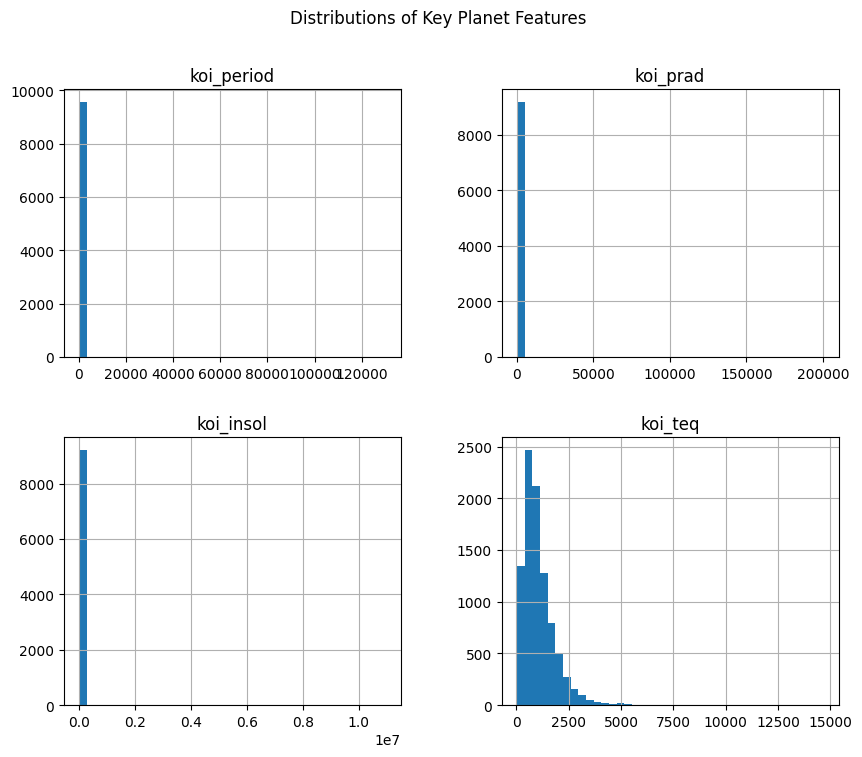

In [6]:
num_cols = ['koi_period', 'koi_prad', 'koi_insol', 'koi_teq']

df[num_cols].hist(bins=40, figsize=(10,8))
plt.suptitle("Distributions of Key Planet Features")
plt.show()


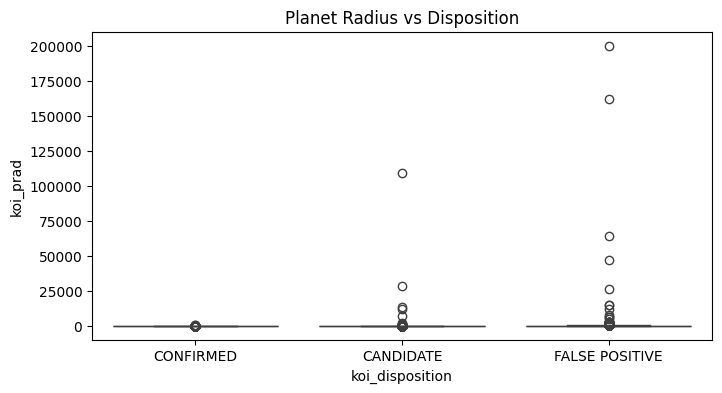

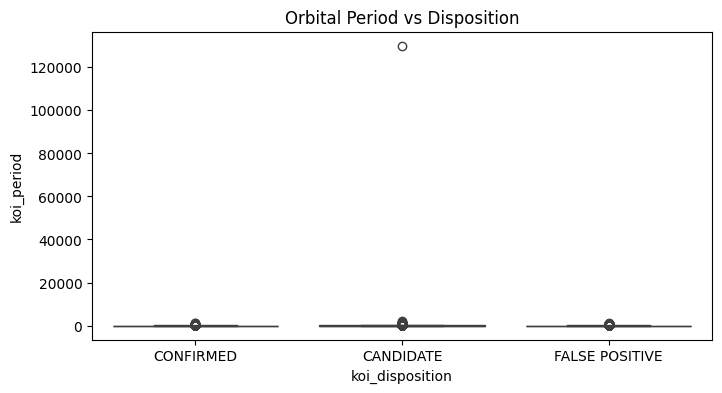

In [7]:
plt.figure(figsize=(8,4))
sns.boxplot(x='koi_disposition', y='koi_prad', data=df)
plt.title("Planet Radius vs Disposition")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x='koi_disposition', y='koi_period', data=df)
plt.title("Orbital Period vs Disposition")
plt.show()



 Initial Correlation Heatmap 🔥
--------------------------------------------------


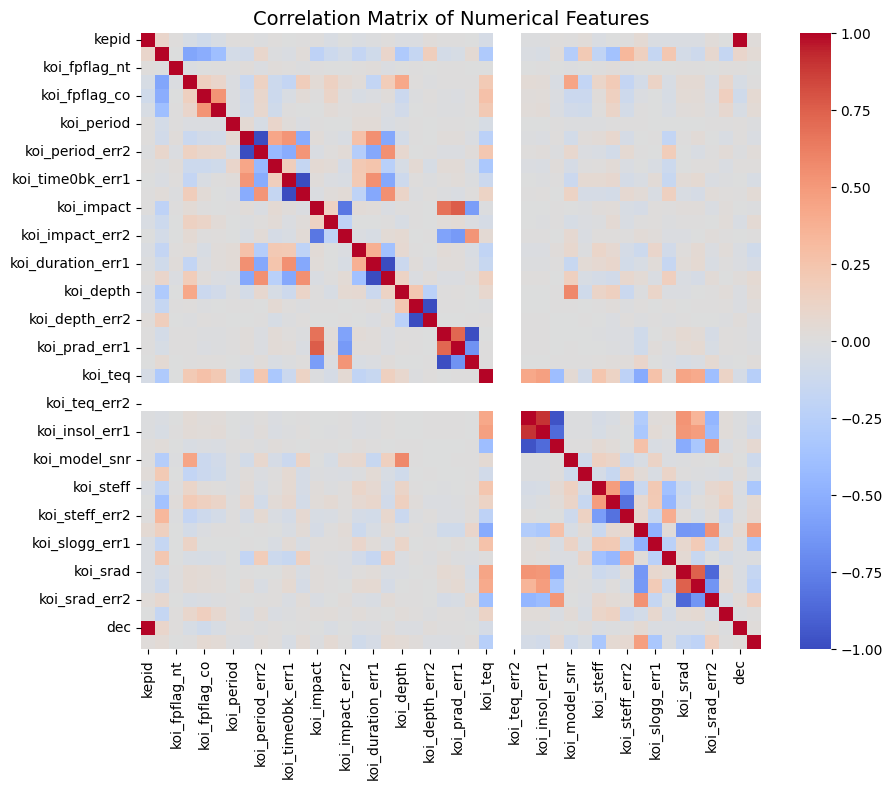

In [8]:
# Initial Correlation Heatmap (Numerical Features) ---
print("\n Initial Correlation Heatmap 🔥")
print("-" * 50)

numerical_df = df.select_dtypes(include=np.number)
if not numerical_df.empty and numerical_df.shape[1] > 1:
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        numerical_df.corr(),
        annot=False,
        cmap='coolwarm',
        vmin=-1, vmax=1
    )
    plt.title('Correlation Matrix of Numerical Features', fontsize=14)
    plt.show()
else:
    print("Not enough numerical features for a meaningful heatmap.")

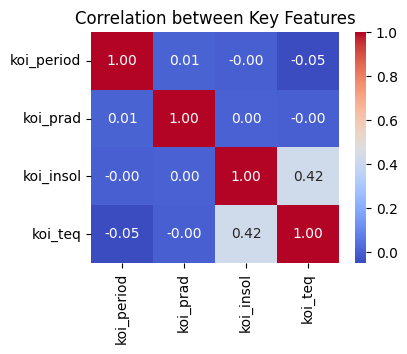

In [9]:
corr = df[num_cols].corr()
plt.figure(figsize=(4,3))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation between Key Features")
plt.show()


In [10]:
# Data Cleaning
target = 'koi_disposition'

drop_cols = [
    'kepid', 'kepoi_name', 'kepler_name',
    'koi_pdisposition', 'koi_tce_delivname'
]

df_model = df.drop(columns=drop_cols, errors='ignore')


In [11]:
# Encode target as labels
y = df_model[target]
X = df_model.drop(columns=[target])

print(X.shape, y.shape)
y.unique()

(9564, 43) (9564,)


array(['CONFIRMED', 'CANDIDATE', 'FALSE POSITIVE'], dtype=object)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# This converts 'CANDIDATE', 'CONFIRMED', etc. into 0, 1, 2
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [14]:
# XGBoost Model


model = XGBClassifier(
    n_estimators=400,
    learning_rate=0.04,
    max_depth=7,
    subsample=0.9,
    colsample_bytree=0.9,
    eval_metric="mlogloss"
)







model.fit(X_train, y_train_encoded)




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.04, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, ...)

In [15]:
y_pred = model.predict(X_test)
print(y_pred)

[2 2 1 ... 2 2 2]


In [16]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test_encoded, y_pred))
print("\nClassification report:\n", classification_report(y_test_encoded, y_pred))




Accuracy: 0.9362258233141663

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       396
           1       0.90      0.90      0.90       549
           2       0.99      0.99      0.99       968

    accuracy                           0.94      1913
   macro avg       0.91      0.91      0.91      1913
weighted avg       0.94      0.94      0.94      1913



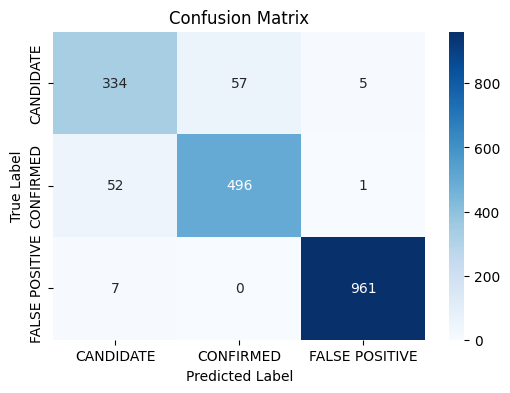

In [17]:
# 1. Generate the matrix using ONLY the encoded integer arrays
# Remove 'labels=y.unique()' here
cm = confusion_matrix(y_test_encoded, y_pred)

# 2. Define your string labels for the plot
# If you used LabelEncoder, use le.classes_ to get them in the correct order (0, 1, 2)
class_names = le.classes_
# If you don't have 'le', define them manually in the order 0, 1, 2:
# class_names = ['CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE']

# 3. Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

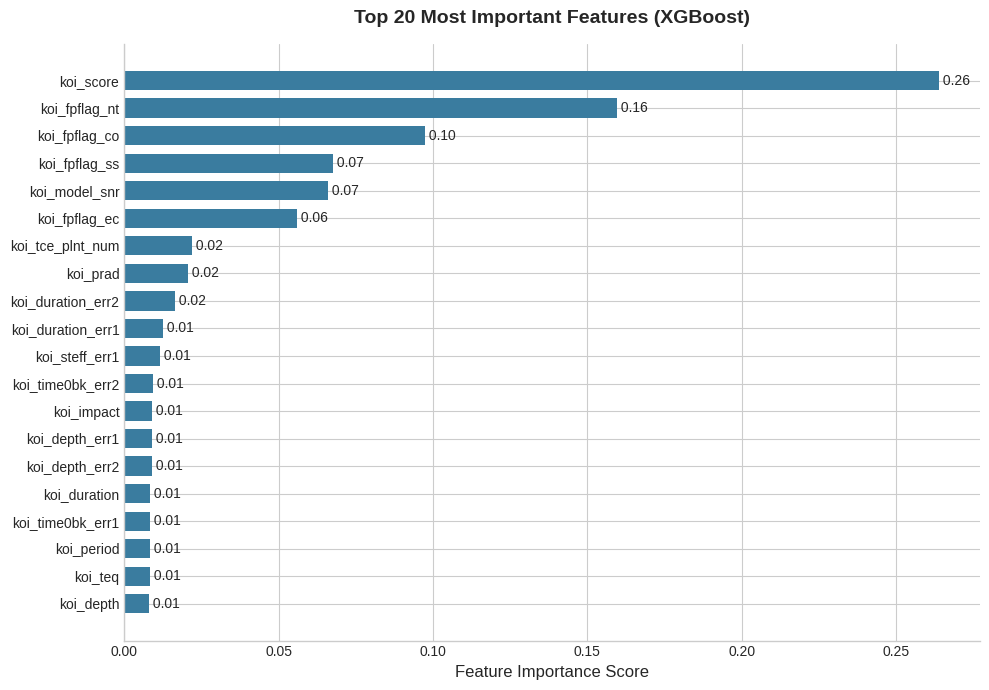

In [18]:
import numpy as np
import pandas as pd

# 1. Data Preparation
# Ensure 'model' and 'X' are defined in your environment
importances = model.feature_importances_
indices = np.argsort(importances)[-20:]
top_features = X.columns[indices]
top_importances = importances[indices]

df_importances = pd.DataFrame({
    'Feature': top_features,
    'Importance': top_importances
}).sort_values(by='Importance', ascending=True)

# 2. Plotting
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))

# Create the horizontal bar chart
ax.barh(
    df_importances['Feature'],
    df_importances['Importance'],
    color='#3A7C9F',
    height=0.7
)

# Add titles and labels
ax.set_title("Top 20 Most Important Features (XGBoost)", fontsize=14, weight='bold', pad=15)
ax.set_xlabel("Feature Importance Score", fontsize=12)
ax.set_ylabel("")

# Add scores next to bars for precision
for i, (name, score) in enumerate(df_importances.values):
    ax.text(score, i, f" {score:.2f}", va='center', fontsize=10)

# Clean up chart borders/spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()



In [19]:
df_clean = df.drop(columns=drop_cols)

In [20]:
iso = IsolationForest(contamination=0.03, random_state=42)
anomaly_labels = iso.fit_predict(X)

df_clean["anomaly"] = anomaly_labels
print(df_clean["anomaly"].value_counts())



anomaly
 1    9277
-1     287
Name: count, dtype: int64


In [21]:
def demo_predictions(model, X_test, y_test_encoded, label_encoder: LabelEncoder, n_samples=5):
    idx = np.random.choice(len(X_test), n_samples, replace=False)

    X_sub = X_test.iloc[idx].copy()
    y_true_enc = y_test_encoded[idx]

    y_pred_enc = model.predict(X_sub)
    y_proba = model.predict_proba(X_sub)

    y_true_str = label_encoder.inverse_transform(y_true_enc)
    y_pred_str = label_encoder.inverse_transform(y_pred_enc)

    confidence = np.max(y_proba, axis=1) * 100

    demo_df = pd.DataFrame({
        'Actual Label': y_true_str,
        'Predicted Label': y_pred_str,
        'Confidence (%)': confidence.round(2),
        'Correct?': y_true_str == y_pred_str
    }, index=X_sub.index)

    return demo_df



In [22]:
demo_df = demo_predictions(
    model=model,
    X_test=X_test,
    y_test_encoded=y_test_encoded,
    label_encoder=le,
    n_samples=10
)

print("--- Sample Predictions ---")
print(demo_df)

--- Sample Predictions ---
        Actual Label Predicted Label  Confidence (%)  Correct?
5883       CONFIRMED       CONFIRMED       83.709999      True
345        CONFIRMED       CONFIRMED       75.430000      True
8681       CANDIDATE       CANDIDATE       96.650002      True
3422       CONFIRMED       CONFIRMED       99.669998      True
2186       CONFIRMED       CONFIRMED       90.489998      True
1957       CANDIDATE       CANDIDATE       81.500000      True
3252       CONFIRMED       CONFIRMED       99.919998      True
2403       CANDIDATE       CONFIRMED       98.970001     False
8338  FALSE POSITIVE  FALSE POSITIVE       99.980003      True
2440       CONFIRMED       CONFIRMED       86.980003      True
